In [1]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()


In [2]:
torch.cuda.is_available()

False

In [3]:
device = torch.device("cpu")

In [4]:
class Classifier(nn.Module):
    def __init__(self,num_inputs,num_hidden,num_outputs):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs,num_hidden)
        self.act_fn  = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden,num_outputs)
        
    def forward(self,x):
        x=self.linear1(x)
        x=self.act_fn(x)
        x=self.linear2(x)
        return x

In [5]:
model = Classifier(2,4,1)
print(model)

Classifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [6]:
#state_dict=torch.load("trained_model.tar")

In [7]:
#model.load_state_dict(state_dict)

In [8]:
for name,param in model.named_parameters():
    print("param %s, shape %s" %(name,str(param.shape)))

param linear1.weight, shape torch.Size([4, 2])
param linear1.bias, shape torch.Size([4])
param linear2.weight, shape torch.Size([1, 4])
param linear2.bias, shape torch.Size([1])


In [9]:
print(model.state_dict())

OrderedDict([('linear1.weight', tensor([[ 0.2443, -0.2667],
        [-0.6621,  0.0618],
        [-0.5418,  0.5630],
        [-0.1863, -0.0472]])), ('linear1.bias', tensor([-0.1006,  0.4155, -0.0437,  0.1663])), ('linear2.weight', tensor([[ 0.0078,  0.2923, -0.3196,  0.0017]])), ('linear2.bias', tensor([0.3354]))])


In [10]:
class XORDataset(data.Dataset):
    def __init__(self,size,std=0.1):
        super().__init__()
        self.size=size
        self.std=std
        self.generate_continuous_xor()
        
    def generate_continuous_xor(self):
        data=torch.randint(low=0,high=2,size=(self.size,2),dtype=torch.float32)
        label=(data.sum(dim=1)==1).to(torch.long)
        data+=self.std*torch.randn(data.shape)
        self.data=data
        self.label=label
    
    def __len__(self):
        return self.size
    
    def __getitem__(self,idx):
        datapoint = self.data[idx]
        datalabel = self.label[idx]
        return datapoint,datalabel
    

In [11]:
train_dataset = XORDataset(size=1000)

In [12]:
train_dataloader=data.DataLoader(train_dataset,batch_size=128,shuffle=True)

In [13]:
i=0
for batch in train_dataloader:
    #print(batch[0].size())
    i+=1
i

8

In [14]:
loss_module = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [15]:
#model.to(device)

In [16]:
from tqdm.notebook import tqdm

In [28]:
def train_model(model,optimizer,data_loader,loss_module,num_epochs=1000):
    l=[]
    model.train()
    for e in tqdm(range(num_epochs)):
        for data_inputs,data_labels in data_loader:
            #send to device
            #data_inputs,data_labels = data_inputs.to(device),data_labels.to(device)
            #forward pass
            preds=model(data_inputs)
            print(preds.shape,end='')
            preds=preds.squeeze(dim=1)
            print(preds.shape,'\n')
            #loss
            loss=loss_module(preds,data_labels.float())
            l.append(loss)
            #backprop
            optimizer.zero_grad()
            loss.backward()
            #SGD step
            optimizer.step()
    return l

In [29]:
l=train_model(model,optimizer,train_dataloader,loss_module)

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 




torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 


torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 




torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 


torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 



torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([104, 1])torch.Size([104]) 

torch.Size([128, 1])torch.Size([128]) 

torch.Size([128, 1])torch.Size([128]) 



In [19]:
print(l[0])
print(l[-1])

tensor(0.6967, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0039, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


In [20]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-1.6860, -1.6977],
        [-3.8368,  3.3376],
        [-3.5079,  4.1279],
        [-0.2316, -0.0681]])), ('linear1.bias', tensor([ 0.0803, -1.6302,  1.4588,  0.7688])), ('linear2.weight', tensor([[-2.9246,  6.1860, -6.1309,  0.8760]])), ('linear2.bias', tensor([2.9984]))])


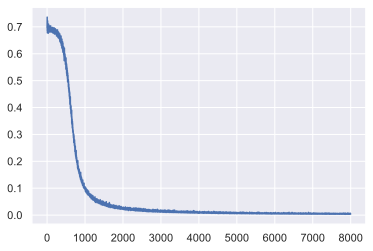

In [21]:
plt.plot(l)

In [22]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False) 

In [23]:
d,l=next(iter(test_data_loader))

In [24]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.
    
    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1
            
            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
            
    acc = true_preds / num_preds
    print("Accuracy of the model: %4.2f%%" % (100.0*acc))

In [25]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


In [26]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    
    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2) # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = preds * c0[None,None] + (1 - preds) * c1[None,None] # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy() # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='upper', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)



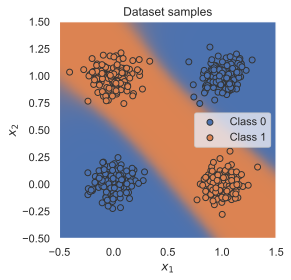

In [27]:
visualize_classification(model, test_dataset.data, test_dataset.label)
plt.show()